# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: Zaina Abushaban


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).
 

## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


In [37]:
#First our imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing and Taking a look at the data

In [38]:
df= pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Defining the checkpoint function:

In [39]:
#Checkpoint Function
def checkpoint(dataframe, filename):
    dataframe.to_csv(f"{filename}.csv", index=False)
    print(f"Checkpoint '{filename}' created.")
    df= dataframe.copy(deep=True)

First, let's encode Gender.

In [40]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data = df[['Gender']]
encoded_data = encoder.fit_transform(data)
df['Gender']=encoded_data
checkpoint(df,"all_numerical")


Checkpoint 'all_numerical' created.


Customer ID is not relevant, so we can drop it

In [41]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40


Handling null values & outliers

In [42]:
#No null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_condition_col = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df.loc[outliers_condition_col, col]
    if outliers.empty:
        print("No outliers in",col,"column")
    else:
        #For all outliers, impute with the median of the column 
        col_median = df[~outliers_condition_col][col].median()
        df.loc[outliers_condition_col, col] = col_median

#Making the checkpoint:
checkpoint(df, "no_outliers")


No outliers in Gender column
No outliers in Age column
No outliers in Spending Score (1-100) column
Checkpoint 'no_outliers' created.


## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

Normalizing the data, so we can make sure all features have the same weight.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
df[df.columns] = scaled_df
checkpoint(df, "Normalized")
df

Checkpoint 'Normalized' created.


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.414414,0.173469


## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

Note: PC1 looks at all the features, and finds the best line to suit as many of the datapoints as possible, after than as to avoid repetetion, every PC is orthoginal to the PC's before it, so it can explain the data on other dimensions.

In [45]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df)


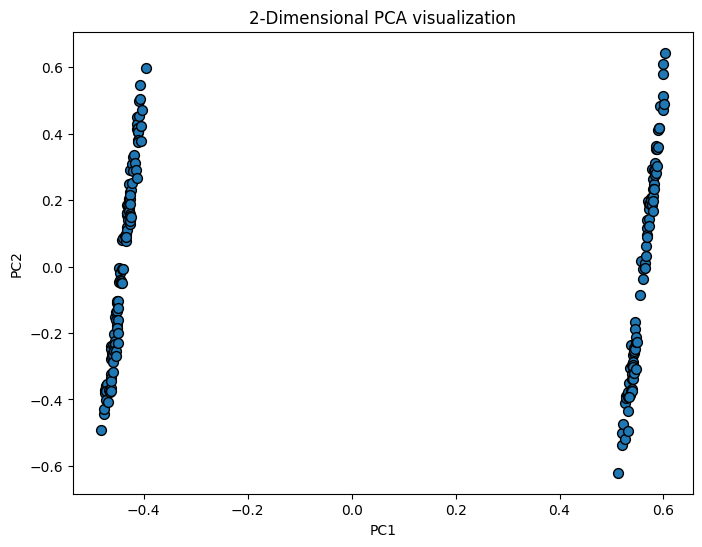

In [46]:
#Visualize using the first two PCs, and noticing there are clusters.
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], cmap='viridis', edgecolor='k', s=50)
plt.title('2-Dimensional PCA visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


We can easily notice 2 clusters, one on the right, another on the left.

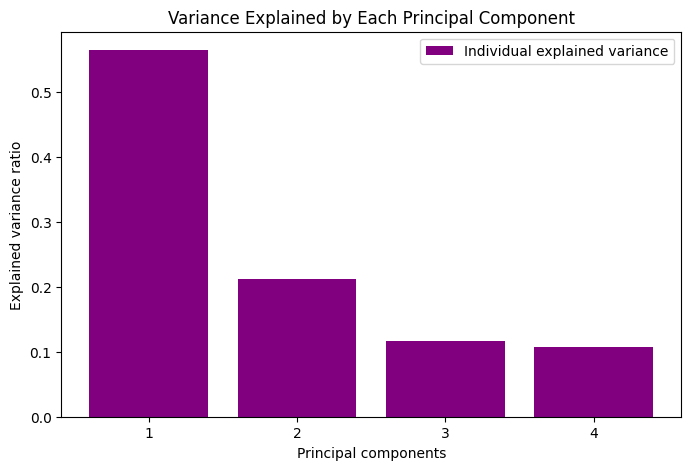

In [47]:
#Visualizing and understanding the variance explained by the PCs, to pick how many are suffecient to explain the data.
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), explained_variance_ratio, color='purple', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, 5))
plt.legend()
plt.show()


The first PC explains around what looks like 55% of the data, then the second explains 22% more, if we choose our threshold to be 80%, then we can say 2 is sufficient, but it would also not be wrong to take 3, because:
If we stop at 2: 55+22= 77% of the data explained.
If we stop at 3: 55+22+12= 89% of the data explained.
The first case might lead to a bit of underfitting, but the second will lead to a bigger overfitting, so it's safer to go with 2 PCs.

## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

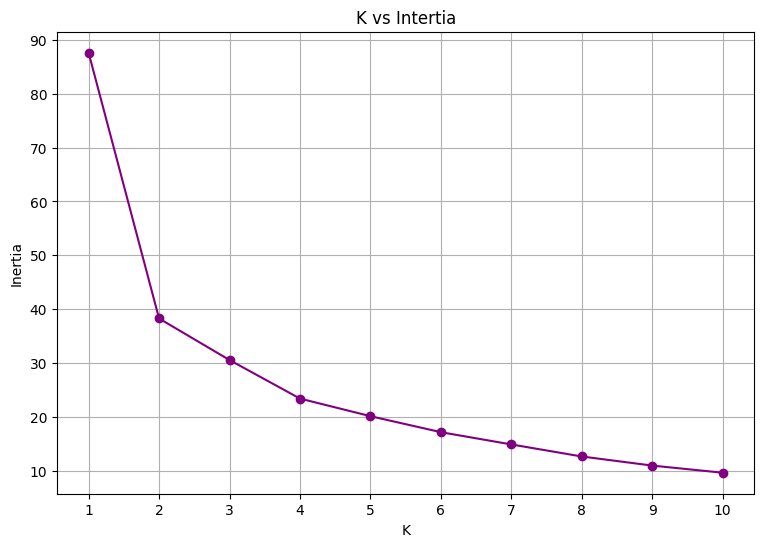

In [48]:
from sklearn.cluster import KMeans

#Cool trick to supress warnings :D
def elbowMethod(df):
    import warnings
    warnings.filterwarnings('ignore')

    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(9, 6))
    plt.plot(range(1, 11), inertia, marker='o', color='purple')
    plt.title('K vs Intertia')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()


elbowMethod(df)

The elbow point seems to be 2, so we will choose that as the optimal K.

Now we need to visualize 2 clusters and check:

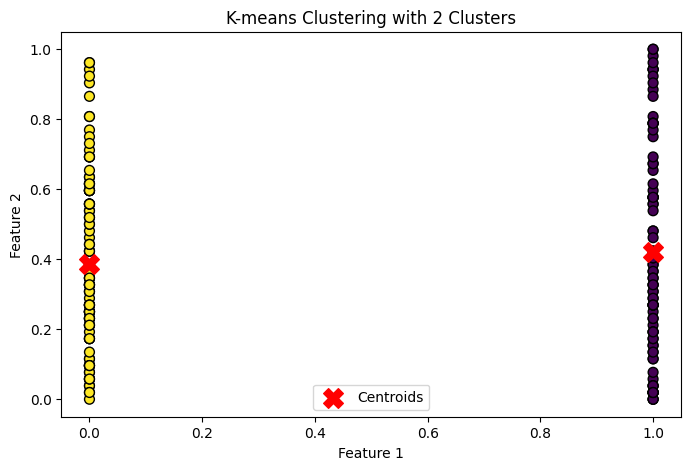

In [49]:

kmeans = KMeans(n_clusters=2, random_state=0)
two_means_clusters = kmeans.fit_predict(df)

plt.figure(figsize=(8, 5))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=two_means_clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

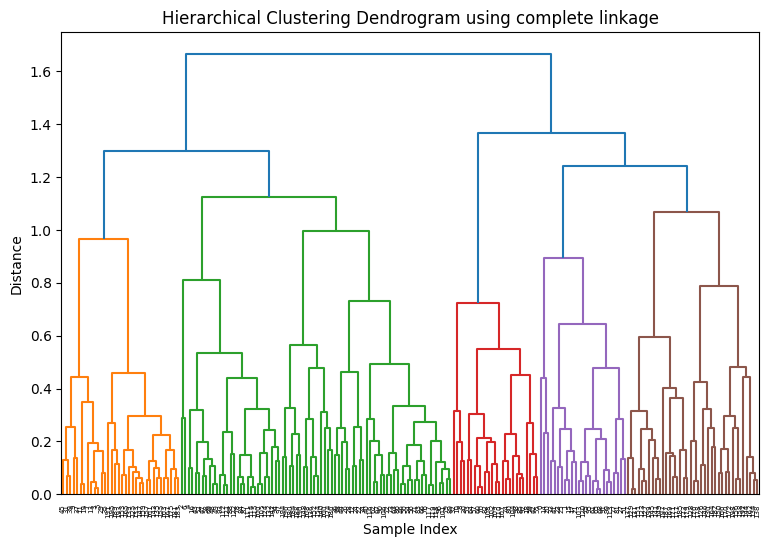

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(9, 6))
Z = linkage(df, method="complete")

plt.title('Hierarchical Clustering Dendrogram using complete linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)

plt.show()



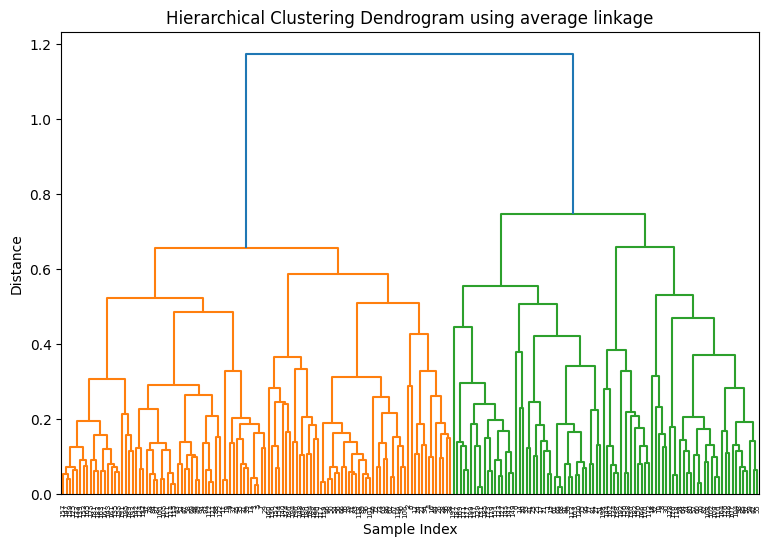

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(9, 6))
Z = linkage(df, method="average")

plt.title('Hierarchical Clustering Dendrogram using average linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)

plt.show()


## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

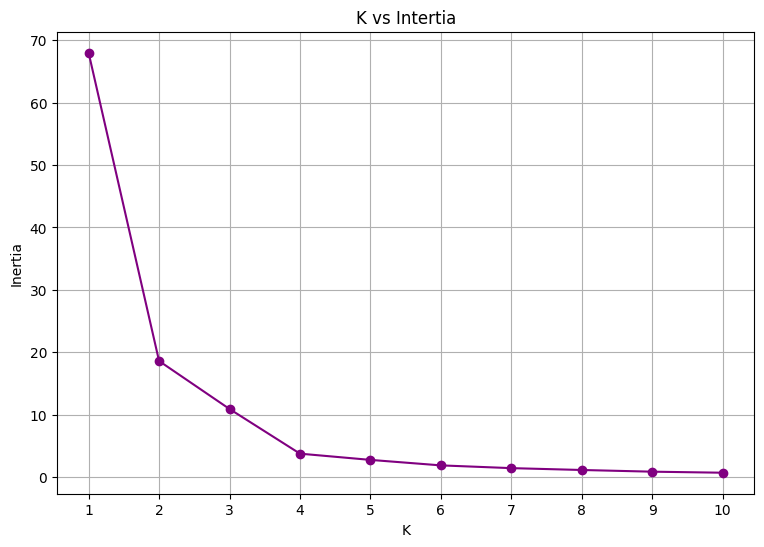

In [52]:
#Now we are going to use the data we got from PCA:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

elbowMethod(df_pca)

The best K also seems to be 2.

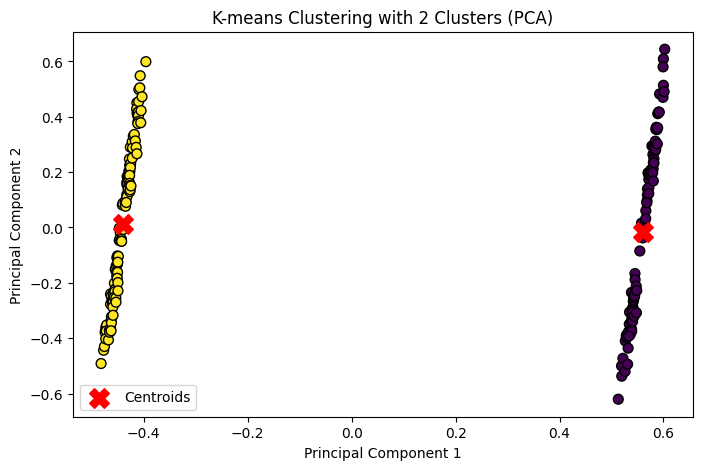

In [53]:
kmeans = KMeans(n_clusters=2, random_state=0)
two_means_clusters_pca = kmeans.fit_predict(df_pca)

plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=two_means_clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with 2 Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

In [54]:
from sklearn.metrics import silhouette_score

silhouette_score_no_PCA = silhouette_score(df,two_means_clusters)
print("Silhouette score for no PCA is" ,silhouette_score_no_PCA)

silhouette_score_PCA = silhouette_score(df_pca,two_means_clusters_pca)
print("Silhouette score for PCA is" ,silhouette_score_PCA)



Silhouette score for no PCA is 0.5137696647910033
Silhouette score for PCA is 0.6776431405587054


The Silhouette score indicates how an object is matched to its own cluster and to neighboring clusters, idealy we want it to be 1, because that signifies simmilarity in one cluster (intra), and dissimilarity in all clusters (inter).
So the higher the Silhouette score the better, this is why we choose PCA modified K-means.
PCA reduces the dimensonality therefore the complexity of our K-means, it also reduces unnecessary noise of data, while preserving the variance of the data, which helps us build a more accurate model that doesn't depend on outliers, and reduces the possibility of overfitting.